In [123]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import tplquad

In [124]:
# Parameters 
L = 10 # length of domain 
dx = dy = dz = 0.2 # mesh steps 
nx = ny = nz = int(L / dx) # mesh points in each dimension 
# k0s = np.linspace(0.1, 4, nx) # momentum of wave pakcket [au] (0.01 to 5) with nx points
k0 = 1
dt = 2 * dx**2 # time step 
xlin = ylin = zlin = np.linspace(0, L, nx) # is only a line 
X, Y, Z = np.meshgrid(xlin, ylin, zlin) # create rectangular grid of all x and y value combinations (3-3D arrays)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X, Y, Z)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()

In [129]:
# Gaussian wave packet
def get_psi0(k0): 
    x0 = L / 4  # center of the wave packet in x
    y0 = z0 = 0
    sigma = L / 10  # width of the wave packet
    # N = (np.pi * sigma ** 2)**(-1/2) # Normalization 2D
    N = (np.pi * sigma ** 2)**(-3/4) # Normalization 3D

    gaussian = np.exp(-(((X - x0) ** 2 + (Y - y0) ** 2 + (Z - z0) ** 2) / (2 * sigma ** 2))) # 3D
    # gaussian = np.exp(-(((X - x0) ** 2 + (Y - y0) ** 2) / (2 * sigma ** 2))) # 2D
    phase = np.exp(1j * k0 * X) # propagating only in x direction 
    psi0 = (gaussian * phase) * N # initial wave function

# Check if normalized 
    def integrand(X, Y, Z):
        gaussian = np.exp(-(((X - x0) ** 2 + (Y - y0) ** 2 + (Z - z0) ** 2) / (2 * sigma ** 2))) # 3D
        phase = np.exp(1j * k0 * X) # propagating only in x direction 
        psi0 = (gaussian * phase) * N # initial wave function
        return psi0 * np.conj(psi0)

    norm, _ = tplquad(integrand, -np.inf, np.inf, -np.inf, np.inf, -np.inf, np.inf)
    print(norm)

    return psi0

    
get_psi0(1)

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:525: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


0.999999999908227


array([[[ 1.86194711e-02+0.00000000e+00j,
          1.82357364e-02+0.00000000e+00j,
          1.71313349e-02+0.00000000e+00j, ...,
          1.95748142e-22+0.00000000e+00j,
          2.70716346e-23+0.00000000e+00j,
          3.59123020e-24+0.00000000e+00j],
        [ 2.97436734e-02+6.15583782e-03j,
          2.91306765e-02+6.02897018e-03j,
          2.73664504e-02+5.66384078e-03j, ...,
          3.12697864e-22+6.47168662e-23j,
          4.32455819e-23+8.95023235e-24j,
          5.73681056e-24+1.18730713e-24j],
        [ 4.36235719e-02+1.88649806e-02j,
          4.27245197e-02+1.84761862e-02j,
          4.01370167e-02+1.73572225e-02j, ...,
          4.58618461e-22+1.98329206e-22j,
          6.34261519e-23+2.74285913e-23j,
          8.41389576e-24+3.63858285e-24j],
        ...,
        [-5.00971914e-12-8.44791188e-13j,
         -4.90647223e-12-8.27380616e-13j,
         -4.60932409e-12-7.77272391e-13j, ...,
         -5.26676194e-32-8.88136431e-33j,
         -7.28384205e-33-1.22827755e-33j

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


/var/folders/w3/12dc4l3n14zb17mtwby_trbc0000gp/T/ipykernel_2608/2237156997.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  while V_x == V_x[int((nx - a * nx) / 2):int((nx + a * nx) / 2)]:


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

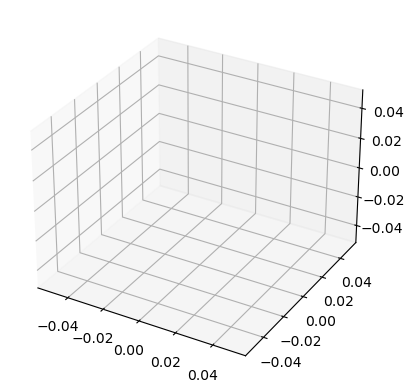

In [ ]:
# Potential initial conditions 
def get_pot(): 
    V0 = 1 # potential strength, this will be on the z-axis 
    a = 0.05 # potential width percentage on x axis 
    b = 0.05 # width on y axis 

    V_x = np.zeros(nx)
    V_y = np.zeros(nx)
    V_z = np.zeros(nx)
    
    while V_x == V_x[int((nx - a * nx) / 2):int((nx + a * nx) / 2)]:
        V_z[int((nx - a * nx) / 2):int((nx + a * nx) / 2)] = V0 # indices for start and end of the well 
    # V_y[int((nx - b * nx) / 2):int((nx + b * nx) / 2)] = V0
    # V_z[int((nx - b * nx) / 2):int((nx + b * nx) / 2)] = V0


    print((V_x))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(V_x,V_y,V_z)
    
    return V_x, V_y, V_z 

get_pot()

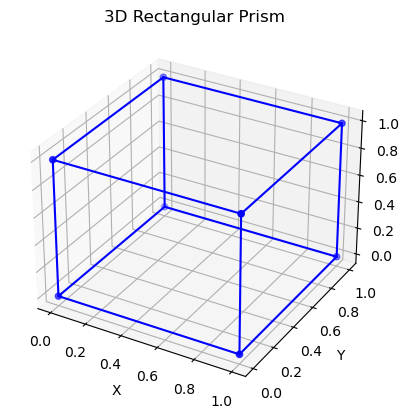

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the vertices of the rectangular prism
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [1, 1, 0],
                     [0, 1, 0],
                     [0, 0, 1],
                     [1, 0, 1],
                     [1, 1, 1],
                     [0, 1, 1]])

# Define the edges of the rectangular prism
edges = [[0, 1], [1, 2], [2, 3], [3, 0],
         [4, 5], [5, 6], [6, 7], [7, 4],
         [0, 4], [1, 5], [2, 6], [3, 7]]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot vertices
ax.scatter3D(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='b')

# Plot edges
for edge in edges:
    ax.plot3D(*zip(*vertices[edge]), color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Rectangular Prism')

plt.show()
